In [1]:
import best_tickers as tickers
import backtesting as bt
import sys
sys.path.append('../data_clean/')
import newClean as nc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
year = 2019

In [3]:
df_years, min_year, max_year = nc.get_data()

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


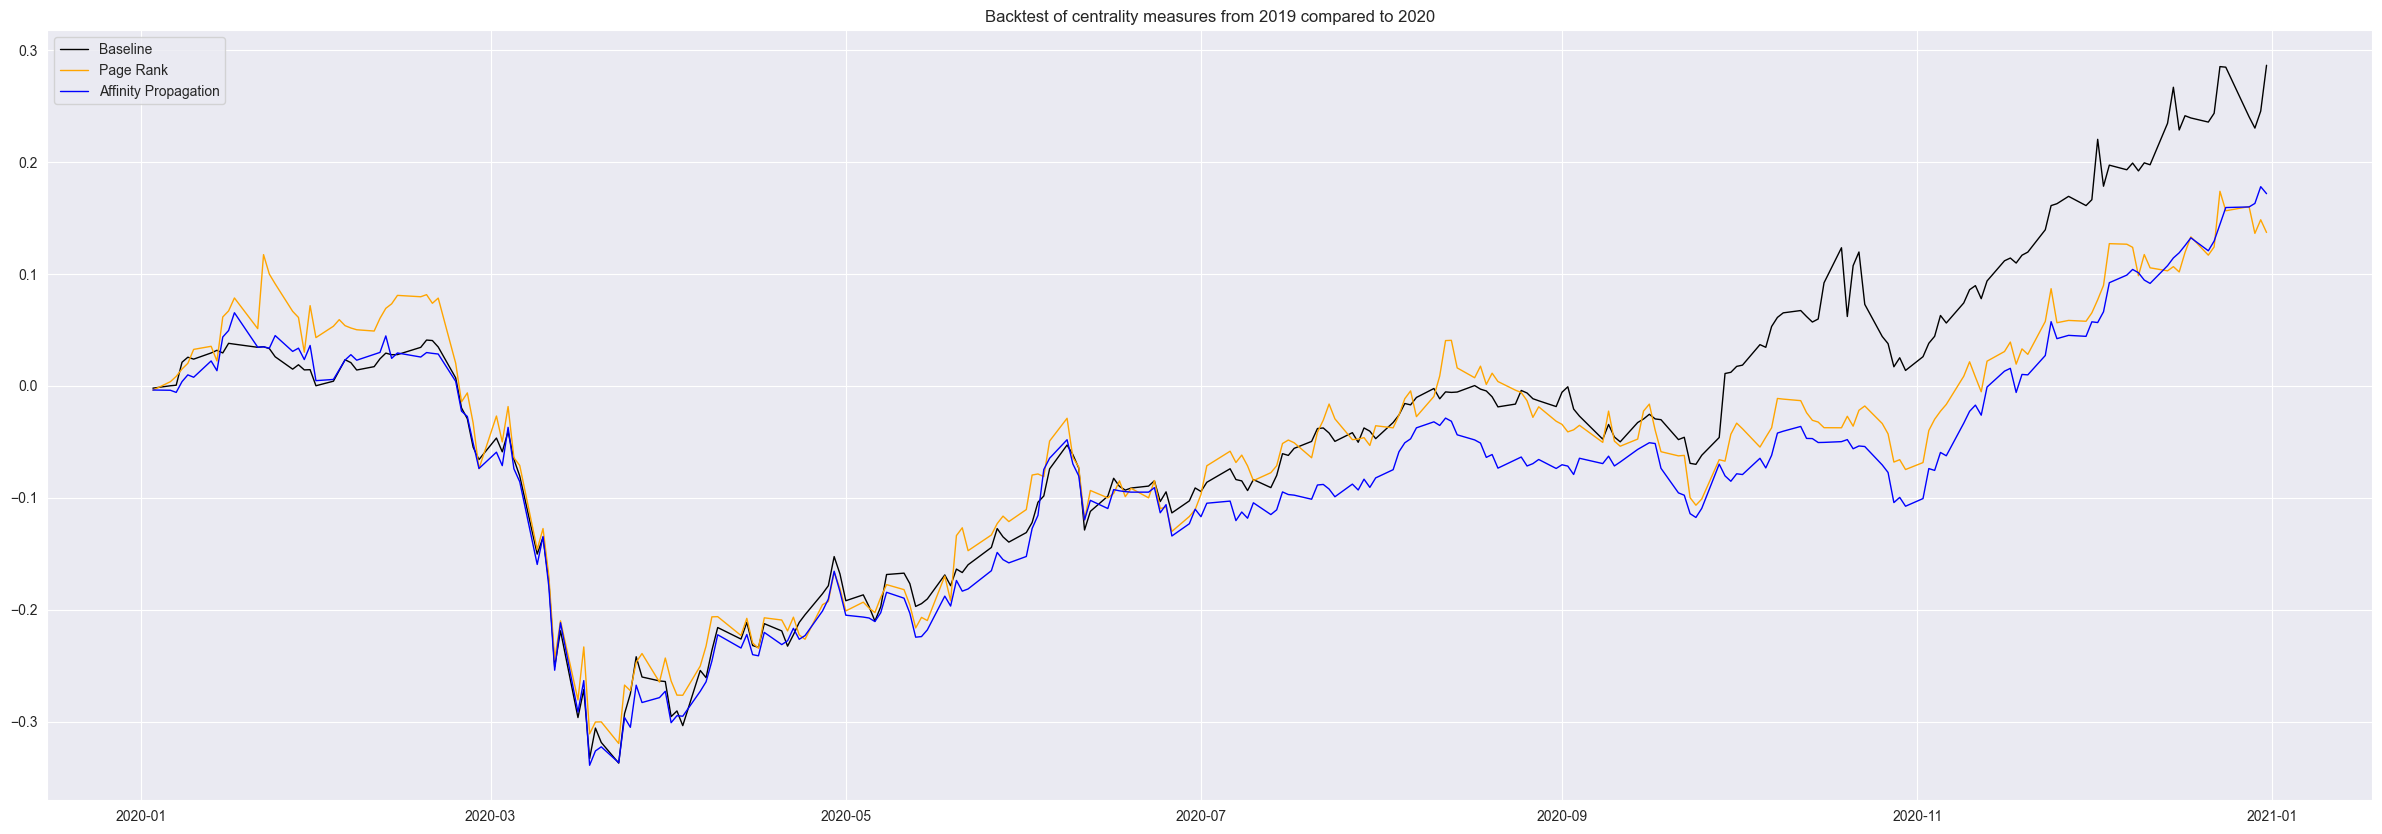

In [ ]:
plt.figure(figsize=(30,20))
tickers.plot_centrality_backtest(year, df_years, min_year)

In [5]:
baseline, closeness, current_flow, page_rank, eigen_vector, affinity_prop = tickers.centrality_all(year, df_years, min_year)

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [6]:
np.mean(baseline)

-0.03344059138338615

In [7]:
np.mean(closeness)

-0.06521543197959699

In [8]:
print("closeness", np.mean(closeness)/np.mean(baseline), ", from", np.mean(baseline), ", to", np.mean(closeness))
print("current_flow", np.mean(current_flow)/np.mean(baseline), ", from", np.mean(baseline), ", to", np.mean(closeness))
print("page_rank", np.mean(page_rank)/np.mean(baseline), ", from", np.mean(baseline), ", to", np.mean(closeness))
print("eigen_vector", np.mean(eigen_vector)/np.mean(baseline), ", from", np.mean(baseline), ", to", np.mean(closeness))
print("affinity_prop", np.mean(affinity_prop)/np.mean(baseline), ", from", np.mean(baseline), ", to", np.mean(closeness))


closeness 1.9501877592989316 , from -0.03344059138338615 , to -0.06521543197959699
current_flow 0.835031575901124 , from -0.03344059138338615 , to -0.06521543197959699
page_rank 1.5349987855284153 , from -0.03344059138338615 , to -0.06521543197959699
eigen_vector 2.2704508534139034 , from -0.03344059138338615 , to -0.06521543197959699
affinity_prop 2.2704508534139034 , from -0.03344059138338615 , to -0.06521543197959699


In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

baseline_mean = []
closeness_mean = []
current_flow_mean = []
page_rank_mean = []
eigen_vector_mean = []
affinity_prop_mean = []

for year in range(min_year, max_year):
    print("backtesting for year", year, "test on", year+1)
    baseline, closeness, current_flow, page_rank, eigen_vector, affinity_prop = tickers.centrality_all(year, df_years, min_year)
    
    baseline_mean.append(baseline[-1])
    print("baseline", baseline[-1])
    closeness_mean.append(closeness[-1])
    current_flow_mean.append(current_flow[-1])
    eigen_vector_mean.append(eigen_vector[-1])
    affinity_prop_mean.append(affinity_prop[-1])
    


backtesting for year 2005 test on 2006
baseline 0.20637460922907805
backtesting for year 2006 test on 2007
baseline 0.059967410581498334
backtesting for year 2007 test on 2008
baseline -0.3617731132223115
backtesting for year 2008 test on 2009
baseline 0.9030666476255366
backtesting for year 2009 test on 2010
baseline 0.27197018192521205
backtesting for year 2010 test on 2011
baseline -0.05614366582936756
backtesting for year 2011 test on 2012
baseline 43.48436741286157
backtesting for year 2012 test on 2013
baseline 0.407321730062458
backtesting for year 2013 test on 2014
baseline -0.325200059117493
backtesting for year 2014 test on 2015
baseline 4.4676163513749785
backtesting for year 2015 test on 2016
baseline 0.3413114452170413
backtesting for year 2016 test on 2017


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/networkx/algorithms/centrality/current_flow_betweenness.py:237: RuntimeWarning: invalid value encountered in double_scalars
  betweenness[v] = float((betweenness[v] - v) * 2.0 / nb)


baseline 2.152051557047657
backtesting for year 2017 test on 2018
baseline -0.7436066687009762
backtesting for year 2018 test on 2019
baseline 0.06225398566229838
backtesting for year 2019 test on 2020
baseline 0.28647726884946534
backtesting for year 2020 test on 2021
baseline -inf


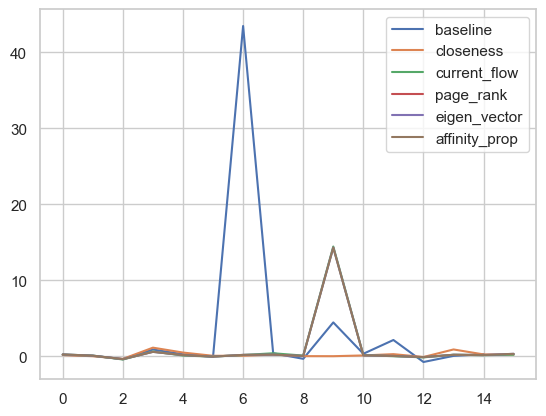

In [29]:
sns.set_theme(style="whitegrid")
plt.plot(baseline_mean, label="baseline")
plt.plot(closeness_mean, label="closeness")
plt.plot(current_flow_mean, label="current_flow")
plt.plot(page_rank_mean, label="page_rank")
plt.plot(eigen_vector_mean, label="eigen_vector")
plt.plot(affinity_prop_mean, label="affinity_prop")

plt.legend()
plt.show()